In [1]:
import pandas as pd

# Load train and test data
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# Split into features and labels
X_train = train_data.drop(columns=["Anomaly_Label"])
y_train = train_data["Anomaly_Label"]

X_test = test_data.drop(columns=["Anomaly_Label"])
y_test = test_data["Anomaly_Label"]

print(f"Loaded Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Loaded Training Set: (936, 12), Testing Set: (235, 12)


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_train_scaled)

# Convert predictions (-1 for anomalies, 1 for normal) to (0,1) format
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

# Evaluate Model
from sklearn.metrics import classification_report
print("Isolation Forest Classification Report:")
print(classification_report(y_train, y_pred_iso))


Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.84      0.66       542
           1       0.10      0.02      0.04       394

    accuracy                           0.50       936
   macro avg       0.32      0.43      0.35       936
weighted avg       0.35      0.50      0.40       936



In [3]:
print("X_train shape:", X_train.shape)


X_train shape: (936, 12)


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

# Normalize Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM Model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[2]))),
    BatchNormalization(),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

# Train Model with Learning Rate Scheduler
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr])

# Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype('int32')
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Epoch 1/50


C:\Users\MADHUCHANDRA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5771 - loss: 0.7956 - val_accuracy: 0.6255 - val_loss: 0.6806 - learning_rate: 5.0000e-04
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6738 - loss: 0.6266 - val_accuracy: 0.6255 - val_loss: 0.6743 - learning_rate: 5.0000e-04
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7220 - loss: 0.5510 - val_accuracy: 0.6255 - val_loss: 0.6687 - learning_rate: 5.0000e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7170 - loss: 0.5732 - val_accuracy: 0.6255 - val_loss: 0.6657 - learning_rate: 5.0000e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7425 - loss: 0.5149 - val_accuracy: 0.6255 - val_loss: 0.6662 - learning_rate: 5.0000e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7655 - loss: 0.4919 - val_accuracy: 0.6255 - val_loss: 0.6647 - learning_rate: 5.0000e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7676 - loss: 0.4660 - 

Loaded Training Set: (936, 12), Testing Set: (235, 12)
Accuracy: 0.9191489361702128
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       147
           1       0.92      0.86      0.89        88

    accuracy                           0.92       235
   macro avg       0.92      0.91      0.91       235
weighted avg       0.92      0.92      0.92       235

Confusion Matrix:
[[140   7]
 [ 12  76]]


C:\Users\MADHUCHANDRA\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:13:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

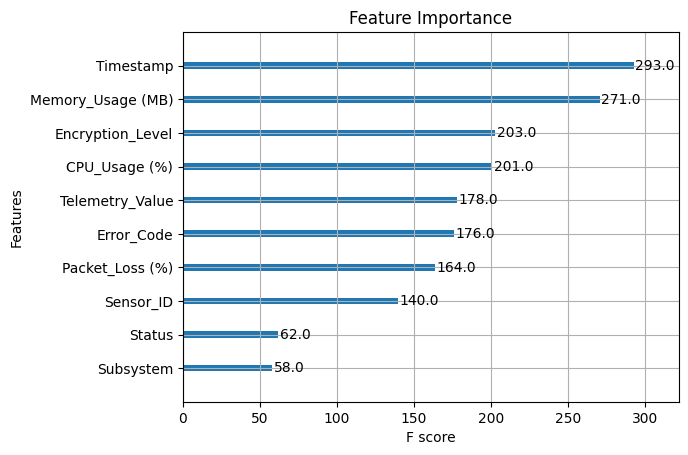

In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load data
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# Split into features and labels
X_train = train_data.drop(columns=["Anomaly_Label"])  # Features
y_train = train_data["Anomaly_Label"]  # Labels

X_test = test_data.drop(columns=["Anomaly_Label"])
y_test = test_data["Anomaly_Label"]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Feature importance visualization
xgb.plot_importance(model)



Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 1.2549 - val_loss: 1.1990
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2340 - val_loss: 1.1765
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.1988 - val_loss: 1.1547
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.1775 - val_loss: 1.1335
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.1565 - val_loss: 1.1129
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.1368 - val_loss: 1.0932
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.1287 - val_loss: 1.0740
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0962 - val_loss: 1.0556
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0698 - val_loss: 1.0379
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0688 - val_loss: 1.0207
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0263 - val_loss: 1.0042
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0213 - val_loss: 0.9883
E

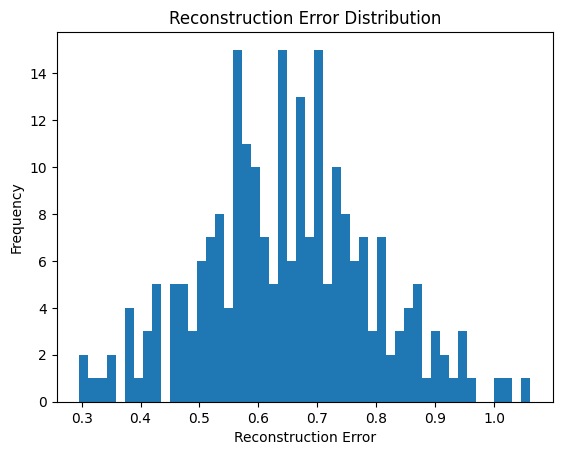

In [6]:
import pandas as pd
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the training and test data
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# Split into features and labels
X_train = train_data.drop(columns=["Anomaly_Label"])
y_train = train_data["Anomaly_Label"]

X_test = test_data.drop(columns=["Anomaly_Label"])
y_test = test_data["Anomaly_Label"]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Autoencoder architecture
input_dim = X_train_scaled.shape[1]  # Number of features
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the Autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, validation_data=(X_test_scaled, X_test_scaled))

# Calculate reconstruction error
reconstructed = autoencoder.predict(X_test_scaled)
reconstruction_error = np.mean(np.abs(reconstructed - X_test_scaled), axis=1)

# Set a threshold for anomaly detection (95th percentile of reconstruction error)
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

# Evaluate anomalies (based on true labels)
print(f"Number of anomalies detected: {np.sum(anomalies)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, anomalies)}")
print(f"Classification Report:\n{classification_report(y_test, anomalies)}")

# Optionally visualize the reconstruction error distribution
import matplotlib.pyplot as plt
plt.hist(reconstruction_error, bins=50)
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.show()
